In [1]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [95]:
data = pd.read_csv('./drive/MyDrive/data.csv')

In [96]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Общая информация о данных**

In [97]:
data.shape

(1338, 7)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [100]:
stats_df = data.describe()
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
median,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [101]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [102]:
data.drop_duplicates(inplace=True)

**Анализ количественной информации**

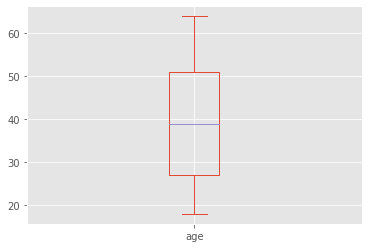

In [90]:
data['age'].plot(kind='box')

In [51]:
IQR = np.quantile(data['age'],0.75) - np.quantile(data['age'],0.25)

In [52]:
IQR

24.0

In [53]:
np.quantile(data['age'],0.75),np.quantile(data['age'],0.25)

(51.0, 27.0)

In [54]:
np.quantile(data['age'], 0.5) == data['age'].median(), np.quantile(data['age'], 0.5)

(True, 39.0)

In [55]:
data['age'].min(),data['age'].max()

(18, 64)

In [56]:
data['age'].plot

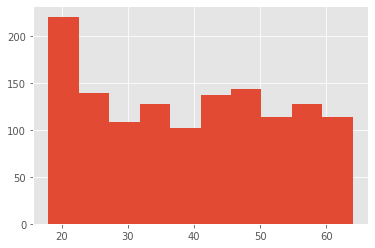

In [57]:
data['age'].hist()

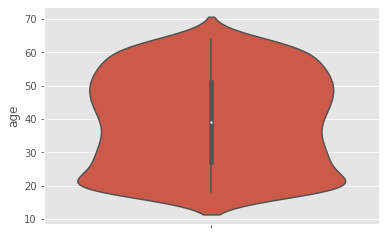

In [58]:
sns.violinplot(y = 'age', data= data )

In [59]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

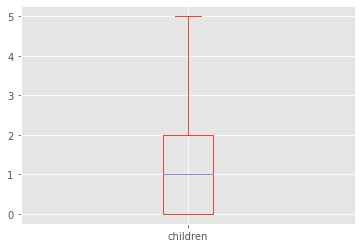

In [60]:
data['children'].plot(kind='box')

In [61]:
IQR = np.quantile(data['children'],0.75) - np.quantile(data['children'],0.25)

In [62]:
IQR

2.0

In [63]:
np.quantile(data['children'],0.75),np.quantile(data['children'],0.25)

(2.0, 0.0)

In [64]:
np.quantile(data['children'], 0.5) == data['children'].median(), np.quantile(data['children'], 0.5)

(True, 1.0)

In [65]:
data['children'].min(),data['children'].max()

(0, 5)

In [66]:
data['children'].plot

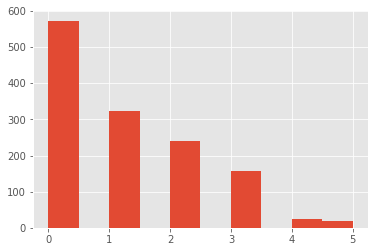

In [67]:
data['children'].hist()

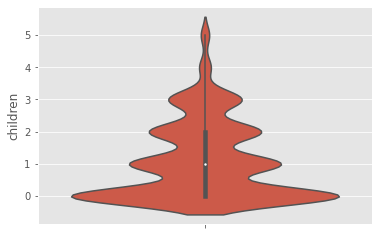

In [68]:
sns.violinplot(y = 'children', data= data )

**Анализ категориальной информации**

In [103]:
def subplots(x,y):
    fig, axis = plt.subplots(x, y, figsize=(20,10))
    fig.tight_layout() # to fit
    return axis

In [104]:
def get_count_precent(ax):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()-0., height, '{:1.1f}%'.format((height/len(data))*100), ha="center", fontsize=15)

In [105]:
def count_plot(features, data):
  axis = subplots(2, 3)
  index = 0
  for i in range(2):
      for j in range(3):
        if index == len(features):
          break
        ax = sns.countplot(ax=axis[i][j],x=features[index],data=data)
        get_count_precent(ax)
        index += 1

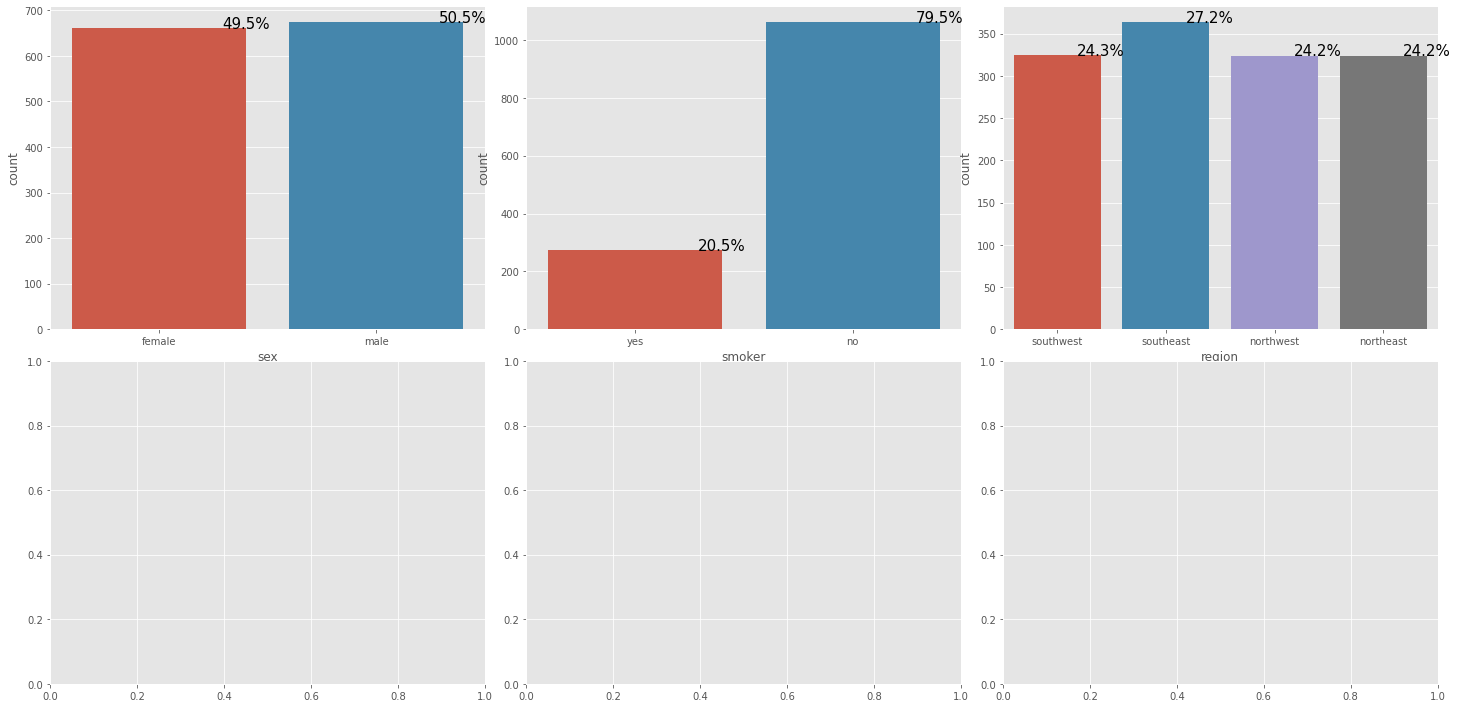

In [107]:
categorical_features = ['sex', 'smoker', 'region']
count_plot(categorical_features, data)

**Анализ зависимостей**

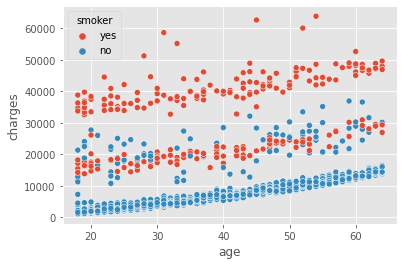

In [108]:
sns.scatterplot(x='age', y='charges', hue="smoker", data=data)

In [110]:
def get_sum_precent(ax, y):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width(), height, '{:1.1f}%'.format((height/data[y].sum())*100), ha="center", fontsize=15)

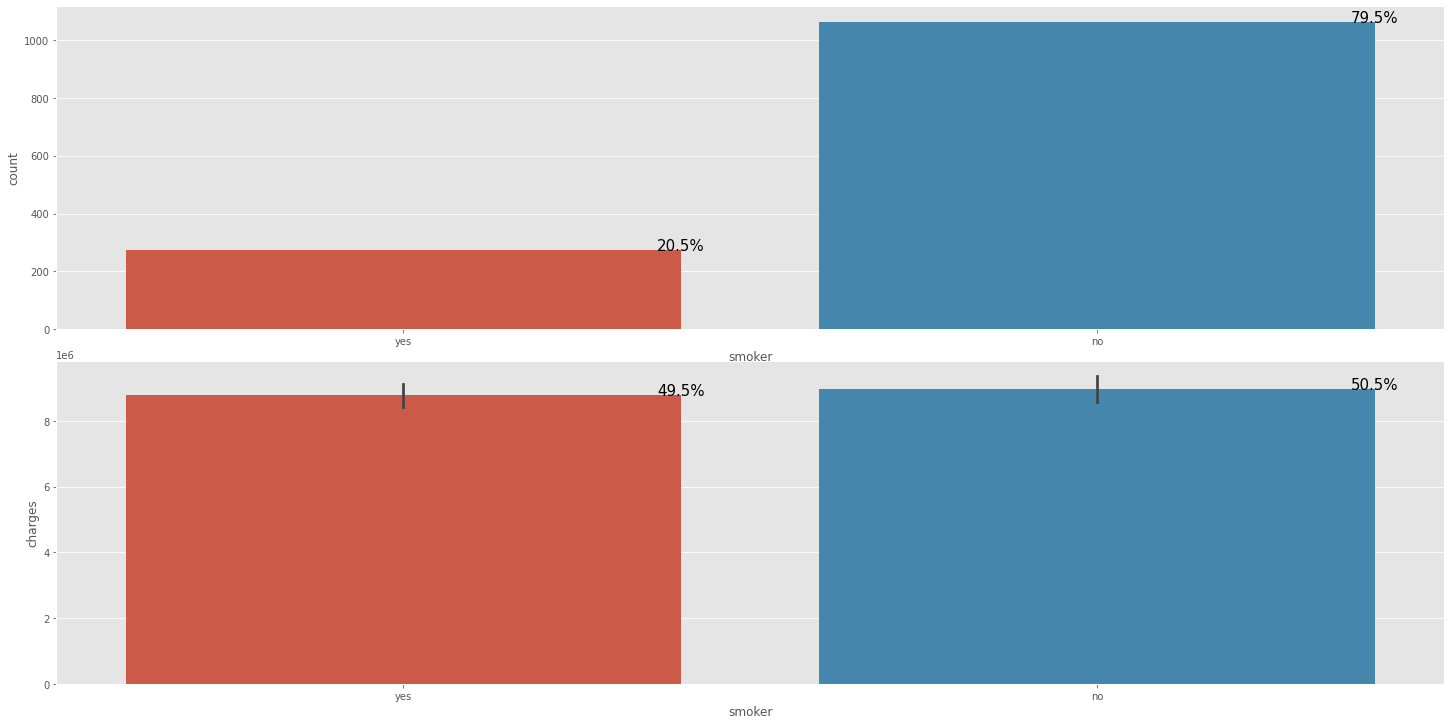

In [111]:
axis = subplots(2,1)
ax = sns.countplot(ax=axis[0],x='smoker',data=data)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1],x='smoker', y='charges', data=data, estimator=sum)
get_sum_precent(ax, 'charges')

In [112]:
df_new = pd.get_dummies(data, columns=['sex', 'region', 'children', 'smoker'])

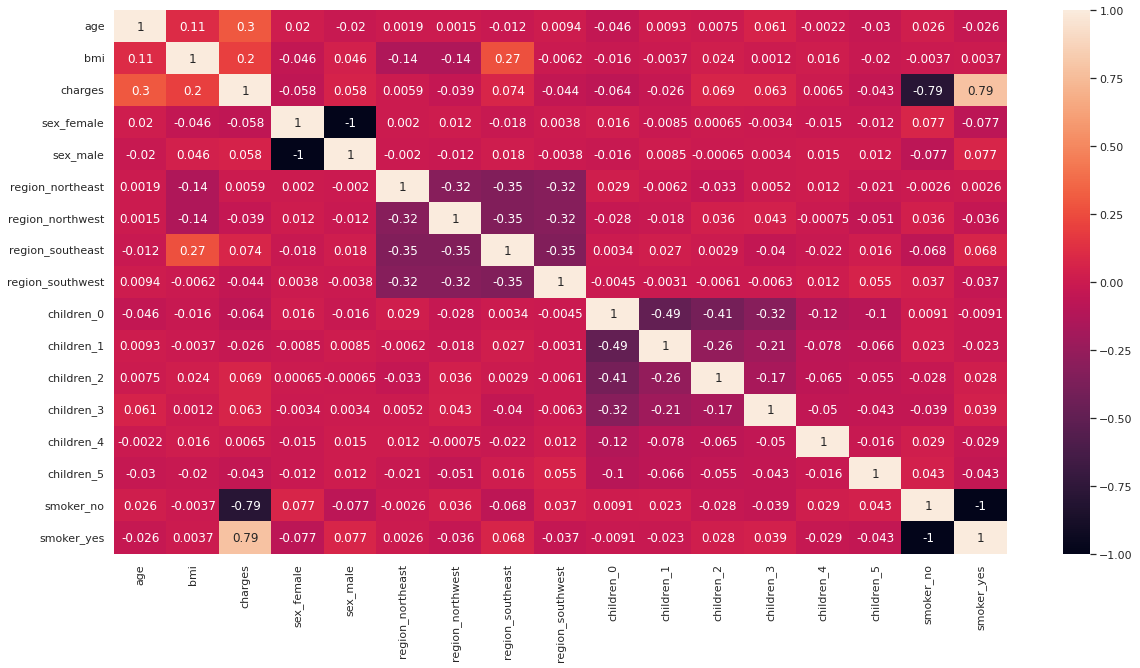

In [113]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(df_new.corr(), annot=True);